In [113]:
#part1: separación entre reciclable y orgánica
#https://www.kaggle.com/yannick09/waste-classification

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

#carga de datos y prprocesamiento

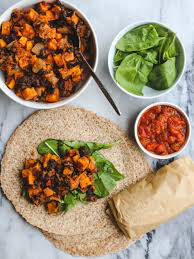

In [54]:
Image.open('DATASET/TEST/O/O_13191.jpg')

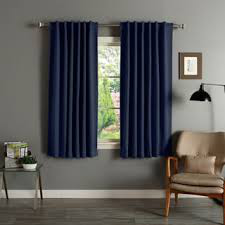

In [55]:
Image.open('DATASET/TEST/R/R_10045.jpg')

In [56]:
# preprocesamiento de imgs

datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.2)
datagen_ts = ImageDataGenerator( rescale = 1./255)

In [57]:
data_tr = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary',subset='training')

data_val = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary',subset='validation')

data_ts = datagen_ts.flow_from_directory('DATASET/TEST', target_size = (128, 128), batch_size = 32, class_mode = 'binary')

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2514 images belonging to 2 classes.


In [147]:
val_labels = data_val.labels
test_labels = data_ts.labels

In [60]:
#modelo 1: sacado del desafío de keras
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(35, (3, 3), input_shape = (128,128, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(35, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 30,  kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 126, 126, 35)      980       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 63, 63, 35)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 61, 61, 35)        11060     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 35)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 31500)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                945030    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)               

In [61]:
#train 1

history = model.fit_generator(data_tr, steps_per_epoch = 250, verbose=True,epochs = 15, validation_data = data_val, validation_steps = 100)

Epoch 1/15
250/250 [==============================] - 87s 349ms/step - loss: 0.6374 - accuracy: 0.7781 - val_loss: 0.5103 - val_accuracy: 0.7722
Epoch 2/15
250/250 [==============================] - 87s 348ms/step - loss: 0.5006 - accuracy: 0.8077 - val_loss: 0.5053 - val_accuracy: 0.7738
Epoch 3/15
250/250 [==============================] - 87s 348ms/step - loss: 0.4835 - accuracy: 0.8130 - val_loss: 0.4665 - val_accuracy: 0.7966
Epoch 4/15
250/250 [==============================] - 87s 347ms/step - loss: 0.4721 - accuracy: 0.8211 - val_loss: 0.4474 - val_accuracy: 0.8037
Epoch 5/15
250/250 [==============================] - 88s 351ms/step - loss: 0.4763 - accuracy: 0.8235 - val_loss: 0.4942 - val_accuracy: 0.7894
Epoch 6/15
250/250 [==============================] - 88s 352ms/step - loss: 0.4631 - accuracy: 0.8305 - val_loss: 0.5025 - val_accuracy: 0.7788
Epoch 7/15
250/250 [==============================] - 87s 348ms/step - loss: 0.4699 - accuracy: 0.8310 - val_loss: 0.5071 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

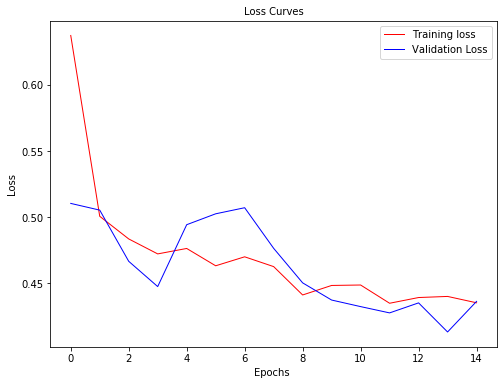

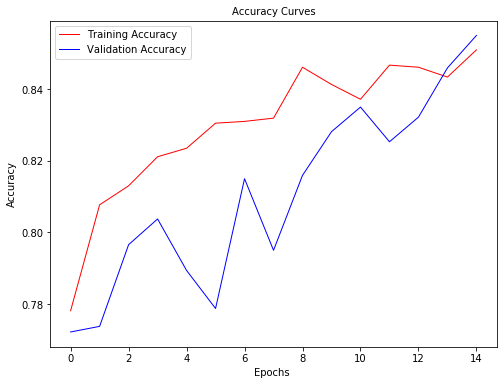

In [62]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


In [141]:
predicted_classes = model.predict_classes(data_ts)

In [73]:
test_labels[0:1402]

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Text(0.5, 15.0, 'Predicted label')

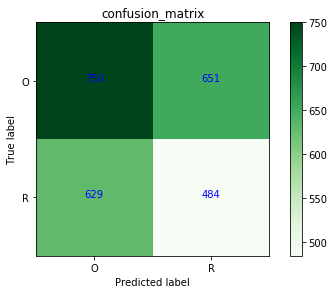

In [142]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(test_labels,predicted_classes) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="blue" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [143]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted_classes,y_pred)

0.5023866348448688

In [108]:
from keras.applications.inception_v3 import InceptionV3

In [110]:
base_model =InceptionV3(weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 0s 0us/step


In [115]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(30, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

In [117]:
from tensorflow.keras.models import Model

model2 = Model(inputs=base_model.input, outputs=predictions)

In [118]:
for layer in base_model.layers:
    layer.trainable = False

In [120]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [121]:
history = model2.fit_generator(data_tr, steps_per_epoch = 250, verbose=True,epochs = 5, validation_data = data_val, validation_steps = 100)

Epoch 1/5
250/250 [==============================] - 80s 322ms/step - loss: 0.3490 - accuracy: 0.8535 - val_loss: 0.2584 - val_accuracy: 0.8928
Epoch 2/5
250/250 [==============================] - 80s 319ms/step - loss: 0.2847 - accuracy: 0.8848 - val_loss: 0.2413 - val_accuracy: 0.8925
Epoch 3/5
250/250 [==============================] - 79s 317ms/step - loss: 0.2702 - accuracy: 0.8917 - val_loss: 0.2206 - val_accuracy: 0.9100
Epoch 4/5
250/250 [==============================] - 80s 318ms/step - loss: 0.2464 - accuracy: 0.8970 - val_loss: 0.2865 - val_accuracy: 0.8744
Epoch 5/5
250/250 [==============================] - 80s 319ms/step - loss: 0.2266 - accuracy: 0.9091 - val_loss: 0.2557 - val_accuracy: 0.8966


In [122]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

0 input_1
1 conv2d_16
2 batch_normalization
3 activation
4 conv2d_17
5 batch_normalization_1
6 activation_1
7 conv2d_18
8 batch_normalization_2
9 activation_2
10 max_pooling2d_16
11 conv2d_19
12 batch_normalization_3
13 activation_3
14 conv2d_20
15 batch_normalization_4
16 activation_4
17 max_pooling2d_17
18 conv2d_24
19 batch_normalization_8
20 activation_8
21 conv2d_22
22 conv2d_25
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_21
29 conv2d_23
30 conv2d_26
31 conv2d_27
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_31
42 batch_normalization_15
43 activation_15
44 conv2d_29
45 conv2d_32
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_28
52 conv2d_30
53 conv2d_33
54 conv2d_34
55 batch_normalization_12
56 batch_no

In [123]:
from tensorflow.keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss ='binary_crossentropy', metrics = ['accuracy'])

In [124]:
history = model2.fit_generator(data_tr, steps_per_epoch = 250, verbose=True,epochs = 5, validation_data = data_val, validation_steps = 100)

Epoch 1/5
250/250 [==============================] - 81s 322ms/step - loss: 0.2129 - accuracy: 0.9146 - val_loss: 0.2495 - val_accuracy: 0.8997
Epoch 2/5
250/250 [==============================] - 81s 323ms/step - loss: 0.2094 - accuracy: 0.9162 - val_loss: 0.2458 - val_accuracy: 0.9003
Epoch 3/5
250/250 [==============================] - 80s 321ms/step - loss: 0.2020 - accuracy: 0.9181 - val_loss: 0.2479 - val_accuracy: 0.9006
Epoch 4/5
250/250 [==============================] - 79s 317ms/step - loss: 0.1999 - accuracy: 0.9222 - val_loss: 0.2496 - val_accuracy: 0.8984
Epoch 5/5
250/250 [==============================] - 80s 319ms/step - loss: 0.2066 - accuracy: 0.9175 - val_loss: 0.2584 - val_accuracy: 0.8969


Text(0.5, 1.0, 'Accuracy Curves')

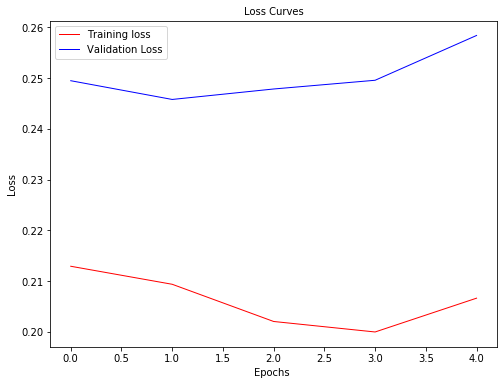

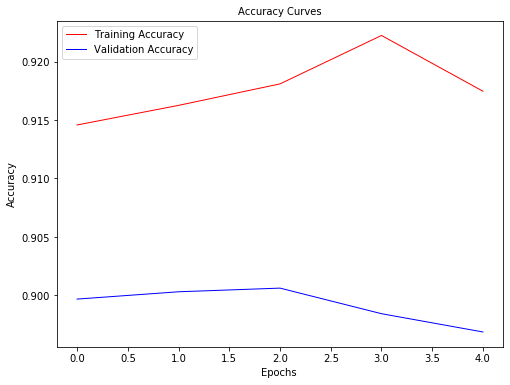

In [125]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


In [153]:
predicted_classes = model2.predict(data_ts)



In [154]:


y_pred = np.around(predicted_classes) 

print(y_pred)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


Text(0.5, 15.0, 'Predicted label')

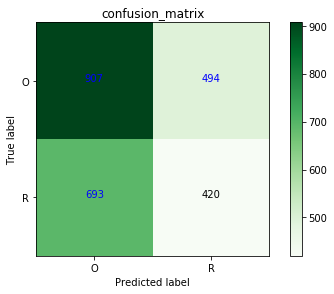

In [156]:
confusion_mtx = confusion_matrix(test_labels,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="blue" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [157]:
accuracy_score(test_labels,y_pred)

0.5278440731901353

In [158]:
#guardar modelo de todas formas

model2.save("InceptionV3_1.h5")